## Car Price Prediction

Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.



Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

https://www.kaggle.com/goyalshalini93/car-data

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Reading and Understanding the Data

Let's start with the following steps:

    Importing data using the pandas library
    Understanding the structure of the data



In [2]:
cars = pd.read_csv('data/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape # check the shape

(205, 26)

In [4]:
cars.describe() # get a summary of our data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Step 2 : Data Cleaning and Preparation


In [6]:
#Splitting company name from CarName column
cars['company_name'] = cars['CarName'].str.split(" ", n = 1, expand = True)[0]
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
cars.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Fixing invalid values**

There seems to be some spelling error in the company_name column.
        
    - maxda = mazda
    - Nissan = nissan
    - porsche = porcshce
    - toyota = toyouta
    - vokswagen = volkswagen = vw

In [8]:
# Convert all the strings into lowercase
cars.company_name = cars.company_name.str.lower()

# Replace all those misspelled words and abbrevated words
def replace_variable(a,b):
    cars.company_name.replace(a,b,inplace=True)

replace_variable('porcshce','porsche')
replace_variable('vokswagen','volkswagen')
replace_variable('maxda','mazda')
replace_variable('vw','volkswagen')
replace_variable('toyouta','toyota')

In [9]:
cars.company_name.unique() # Confirm everything is alright

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name


### Step 3: Visualizing the data

Based on looking at the this distribution plot:
 - The plot seems to be right skewed, which means most of the price are below **15000**
 - There is a high significant difference between the median **(10295)** and the expected value **(13276.71)** in the price distribution
 - Datapoints are spread out from the mean value which indicated high variance in the cars price. (75% of the prices are below 16503, while the remaining 35% are between 16503 and 45,400)

In [11]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

85% of the prices are below $18500 while the remaining 15% are between 18500 and 45,400

In [12]:
cars['price'].quantile(0.85) 

18500.0

There is a high positive correlation between the price and enginesize category and the price with the curbweight (the weight of a car without occupants or baggage)

In [13]:
cars.cov()['price']['enginesize']/(cars.std()['price']*cars.std()['enginesize'])

0.8741448025245123

In [14]:
cars.cov()['price']['curbweight']/(cars.std()['price']*cars.std()['curbweight'])

0.8353048793372965

Correlation plot of some interesting columns

In [15]:
cars[['price', 'curbweight', 'horsepower', 'citympg' ]].corr()

,price,curbweight,horsepower,citympg
price,1.000000,0.835305,0.808139,-0.685751
curbweight,0.835305,1.000000,0.750739,-0.757414
horsepower,0.808139,0.750739,1.000000,-0.801456
citympg,-0.685751,-0.757414,-0.801456,1.000000


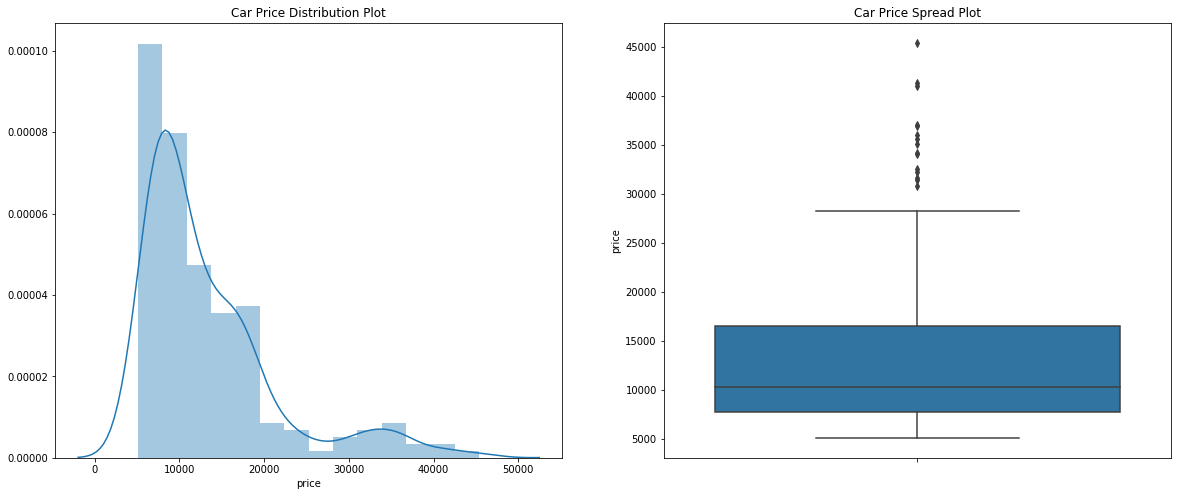

In [16]:
"""
Show a default plot with a kernel density estimate and histogram with bin
size determined
"""

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread Plot')
sns.boxplot(y=cars.price)

plt.show()

### Unconditional Probability

- mpfi and 2bbl are most common type of fuel systems

$$P(\text{fuel system}) = \frac{\text{Number of fuel system}}{\text{Total number of fuel system}}$$

In [17]:
fuelsystem = cars["fuelsystem"].value_counts()  
fuelsystem.head()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
Name: fuelsystem, dtype: int64

In [18]:
print(fuelsystem.sum()) # Total

205


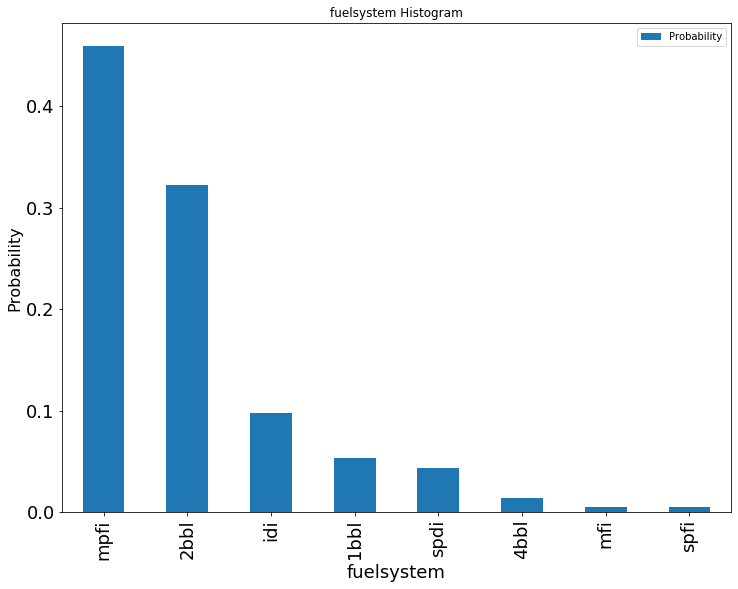

In [19]:
P_company_name = pd.DataFrame((fuelsystem/fuelsystem.sum()))  
P_company_name.columns = ["Probability"]  

P_company_name.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Probability",fontsize=16)
plt.xlabel("fuelsystem",fontsize=18)
plt.title('fuelsystem Histogram')
plt.show()

### Conditional Probability


$$P(\text{car price >= 13276}\ |\  \text{fuelsystem})=\frac{P(\text{fuelsystem}\ |\ \text{car price >= 13276})P(\text{car price >= 13276})}{P(\text{fuelsystem})}$$

In [20]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [21]:
data_temp = cars[cars['price'] >= 13276]['fuelsystem']
data_temp.head()

0    mpfi
1    mpfi
2    mpfi
3    mpfi
4    mpfi
Name: fuelsystem, dtype: object

In [22]:
data_temp2 = data_temp.value_counts().sort_index()
data_temp2

4bbl     1
idi     11
mpfi    62
spdi     2
Name: fuelsystem, dtype: int64

In [23]:
data_temp1 = cars["fuelsystem"].value_counts().sort_index()
data_temp1

1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: fuelsystem, dtype: int64

Probability of car price >= 13276 given fuelsystem type


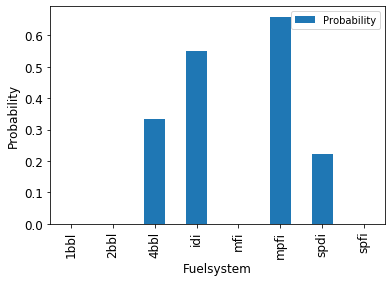

In [24]:
P_T_given_high_score= pd.DataFrame((data_temp2/data_temp1))
P_T_given_high_score.columns = ["Probability"]
print("Probability of car price >= 13276 given fuelsystem type")

P_T_given_high_score.plot(kind='bar', fontsize=12)
plt.xlabel("Fuelsystem",fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.show()

### Confidence Interval

In [25]:
from scipy import stats

In [26]:
## Generate substance of a sample for each one has 10 samples, 30 in total

# find 99 percent confidence interval that the mean of the car price falls in this range
alpha = 0.01
order=1-alpha/2
sample_size = 10
Quant = stats.t.ppf(order, df=sample_size-1) # norm  (use this)
sample_of_means = []

CIs = []
for i in range(30):
    
    sample_of_means.append(cars['price'].sample(sample_size).mean())
    
    margin = Quant * (cars['price'].sample(sample_size).std()/sample_size**0.5)
    CI_MO = (cars['price'].sample(sample_size).mean() - margin, cars['price'].sample(sample_size).mean() + margin)
    CIs.append(CI_MO)
    
print(cars['price'].mean())  
CIs

13276.710570731706


[(140.65657108752202, 22775.543428912475),
 (10049.771889628777, 20087.028110371222),
 (1756.848231711061, 20529.85176828894),
 (-1152.364371399034, 19194.814371399036),
 (-34.309980673764585, 25233.909980673765),
 (6320.564520555978, 16304.835479444022),
 (5086.276404076309, 23622.62359592369),
 (3053.667751916759, 22283.13224808324),
 (6512.649729545366, 26559.650270454633),
 (8119.309995261037, 26931.690004738964),
 (6001.584404733096, 21645.332295266904),
 (10533.238398991805, 13511.011601008195),
 (7443.151269695897, 21094.848730304104),
 (6704.448090615906, 20029.151909384094),
 (5510.746601131259, 20640.153398868744),
 (6780.886131926499, 18538.2138680735),
 (12230.554931615487, 17516.245068384513),
 (3480.452373234816, 15340.447626765184),
 (11715.880992600301, 19972.3190073997),
 (3233.2411036536814, 25350.65889634632),
 (14017.843403192923, 17211.773296807078),
 (2470.5585188851674, 21945.94148111483),
 (5250.757609081452, 18797.24239091855),
 (8053.763241068739, 11512.336758

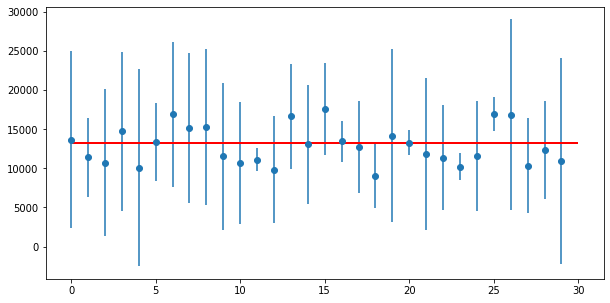

In [27]:
plt.figure(figsize=(10,5))

plt.errorbar(x=np.arange(0, 30), 
             y=sample_of_means[0:30], 
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=30,
           y=cars.mean()['price'], 
           linewidth=2.0,
           color="red")

plt.show()

### Applying Regression

In [28]:
cars

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [29]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [30]:
cars_lr.columns

Index(['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth'],
      dtype='object')

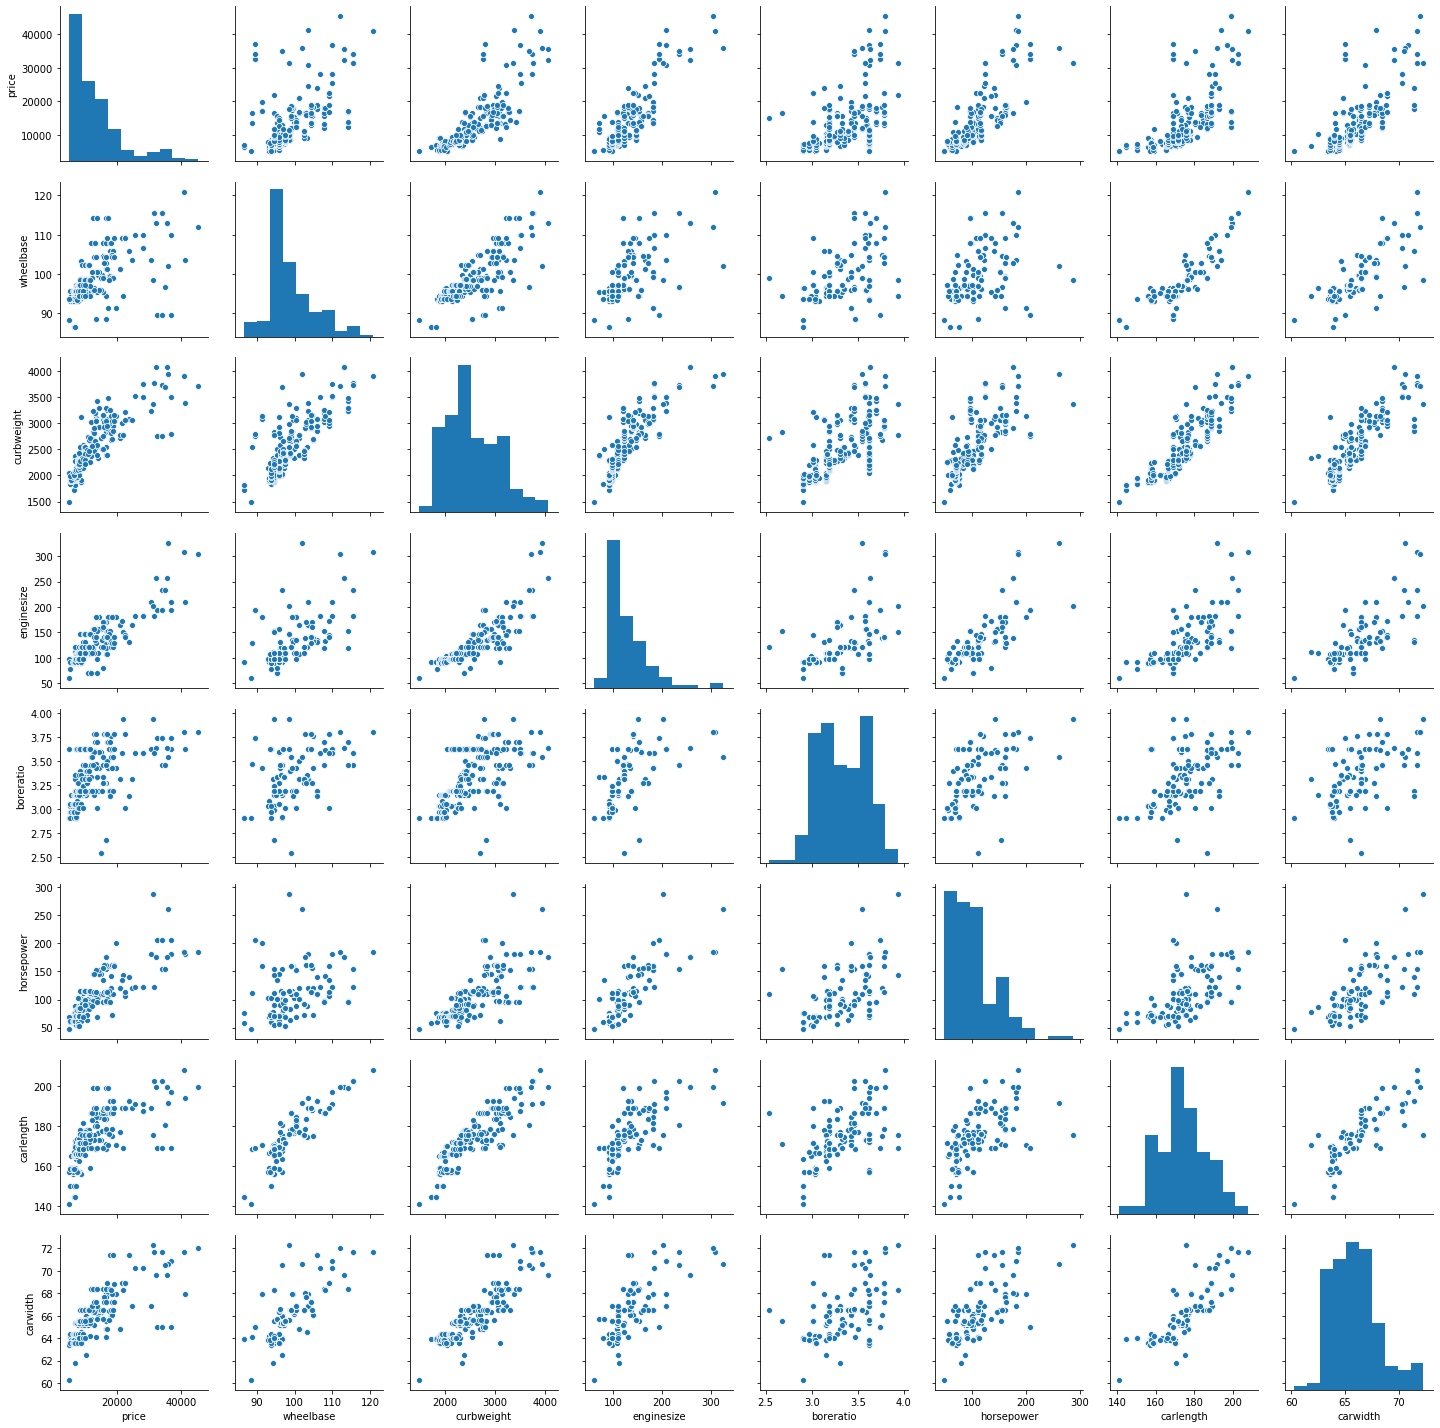

In [31]:
sns.pairplot(cars_lr)
plt.show()

In [32]:
import category_encoders as ce

In [33]:
result = ce.OrdinalEncoder(cols=cars['fueltype'])

In [34]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [35]:
# Applying the function to the cars_lr
cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [36]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,188.8,68.9,1,0,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,3.78,160,188.8,68.8,1,1,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,3.58,134,188.8,68.9,1,0,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,3.01,106,188.8,68.9,0,1,...,1,0,0,0,0,0,1,0,0,0


### Train  - Test - Split Scaling

In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,1,0,0,0,0,1,0,0,0,0


In [40]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


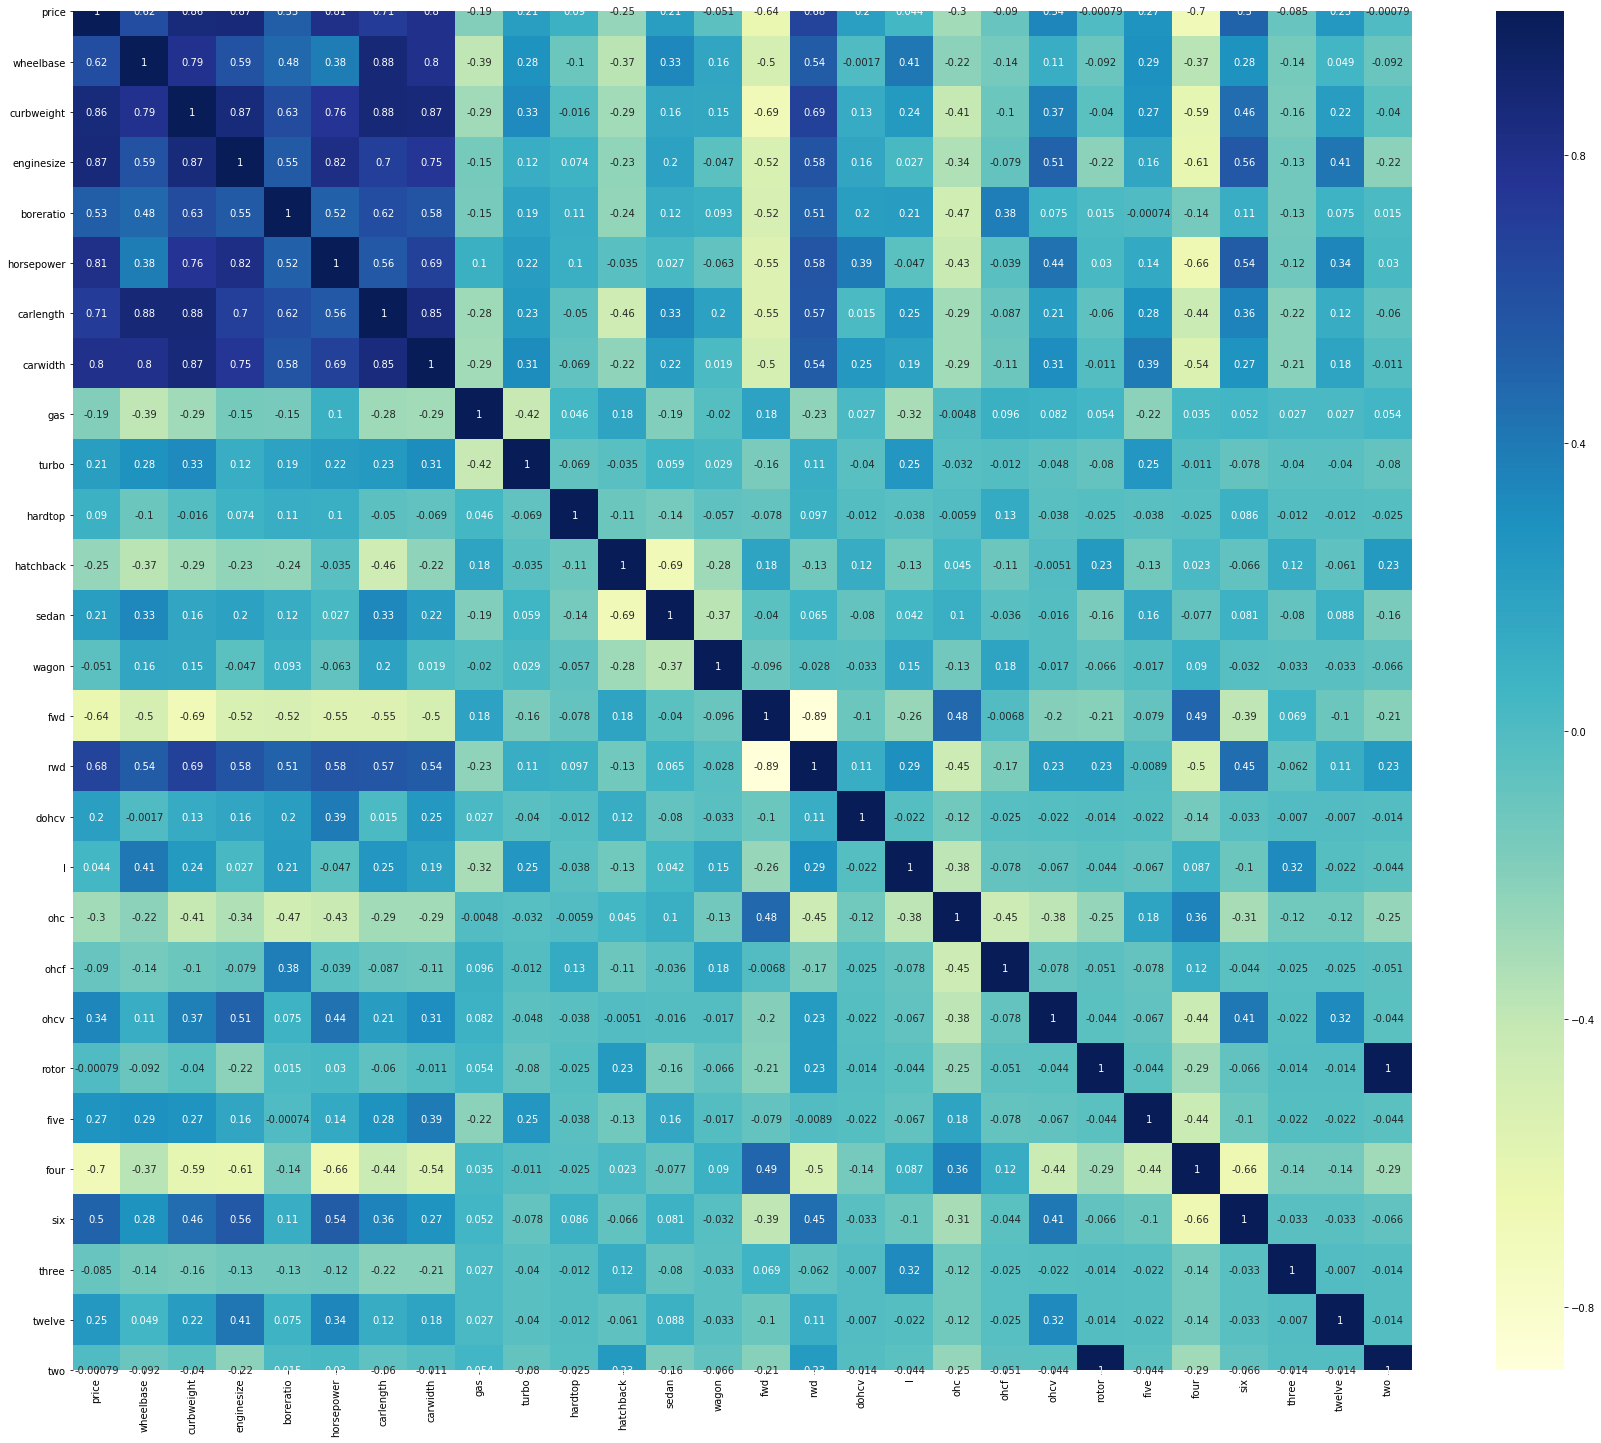

In [41]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Building Linear Regression Models

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 16),
 ('hardtop', False, 9),
 ('hatchback', False, 3),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('fwd', False, 18),
 ('rwd', False, 11),
 ('dohcv', True, 1),
 ('l', False, 15),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', True, 1),
 ('rotor', False, 10),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 17),
 ('twelve', True, 1),
 ('two', False, 12)]

In [46]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'dohcv', 'ohcv',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [47]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,dohcv,ohcv,five,four,six,twelve
122,0.272692,0.139623,0.083333,0.291667,0,0,0,1,0,0
125,0.500388,0.339623,0.395833,0.666667,0,0,0,1,0,0
166,0.314973,0.139623,0.266667,0.308333,0,0,0,1,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,1,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,0,1,0,0


In [48]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

"""
It provides an index that measures how much the variance 
(the square of the estimate's standard deviation) of an
estimated regression coefficient is increased because of collinearity. 
"""
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [49]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     89.56
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           8.01e-54
Time:                        16:04:49   Log-Likelihood:                 163.68
No. Observations:                 143   AIC:                            -305.4
Df Residuals:                     132   BIC:                            -272.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.040      0.725      0.4

In [50]:
X_train_rfe = X_train_rfe.drop("curbweight", axis = 1)
X_train_new = X_train_rfe

p-vale of "curbweight" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [51]:
X_train_new.columns

Index(['enginesize', 'horsepower', 'carwidth', 'dohcv', 'ohcv', 'five', 'four',
       'six', 'twelve'],
      dtype='object')

### Model 2

In [52]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     98.98
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           1.63e-54
Time:                        16:04:49   Log-Likelihood:                 162.88
No. Observations:                 143   AIC:                            -305.8
Df Residuals:                     133   BIC:                            -276.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0278      0.041      0.686      0.4

In [53]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.41
1,enginesize,6.32
7,four,4.97
2,horsepower,4.78
8,six,4.51
3,carwidth,3.57
6,five,2.51
9,twelve,1.83
5,ohcv,1.62
4,dohcv,1.58


dropping "enginesize" because of high VIF value. (shows that curbweight has high multicollinearity.)

In [54]:
X_train_rfe = X_train_rfe.drop("enginesize", axis = 1)
X_train_new = X_train_rfe

In [55]:
X_train_new.columns

Index(['horsepower', 'carwidth', 'dohcv', 'ohcv', 'five', 'four', 'six',
       'twelve'],
      dtype='object')

### Model 3

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     72.75
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           5.11e-45
Time:                        16:04:50   Log-Likelihood:                 136.77
No. Observations:                 143   AIC:                            -255.5
Df Residuals:                     134   BIC:                            -228.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0381      0.047     -0.803      0.4

In [57]:
X_train_rfe = X_train_rfe.drop("twelve", axis = 1)
X_train_new = X_train_rfe

### Model 4

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     83.52
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           6.30e-46
Time:                        16:04:50   Log-Likelihood:                 136.60
No. Observations:                 143   AIC:                            -257.2
Df Residuals:                     135   BIC:                            -233.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0370      0.047     -0.784      0.4

In [59]:
X_train_rfe = X_train_rfe.drop("six", axis = 1)
X_train_new = X_train_rfe

### Model 5

In [60]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     98.16
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           6.10e-47
Time:                        16:04:50   Log-Likelihood:                 136.60
No. Observations:                 143   AIC:                            -259.2
Df Residuals:                     136   BIC:                            -238.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0393      0.040     -0.986      0.3

In [61]:
checkVIF(X_train_new)

,Features,VIF
0,const,24.90
1,horsepower,3.32
6,four,2.59
2,carwidth,2.29
5,five,1.69
4,ohcv,1.50
3,dohcv,1.28


### Residual Analysis of Model

In [62]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

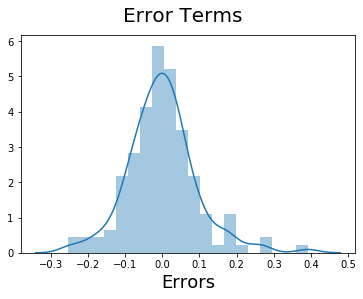

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

The Error term seems to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.


### Prediction and Evaluation

In [64]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [65]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [66]:
X_test.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
160,0.265306,0.132148,0.082969,0.515873,0.116129,0.341732,0.200000,1,0,0,...,1,0,0,0,0,1,0,0,0,0
186,0.311953,0.219125,0.131004,0.515873,0.212903,0.426772,0.315789,1,0,0,...,1,0,0,0,0,1,0,0,0,0
59,0.355685,0.271985,0.187773,0.674603,0.206452,0.522835,0.421053,1,0,0,...,1,0,0,0,0,1,0,0,0,0
165,0.230321,0.214320,0.082969,0.555556,0.387097,0.379528,0.157895,1,0,0,...,0,0,0,0,0,1,0,0,0,0
140,0.195335,0.202307,0.126638,0.857143,0.135484,0.200000,0.136842,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [67]:
test_data_columns = ['horsepower', 'carwidth', 'dohcv', 'ohcv', 'five', 'four']

In [68]:
# Now let's use our model to make predictions.
X_test_new = X_test[test_data_columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new) # Adding Inception - which is required

# Making predictions
y_pred_lr = lm.predict(X_test_new)


Evaluation of test via comparison of y_pred and y_test

In [69]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_lr)

0.7232992924820227

### Evaluation of the model

Text(0, 0.5, 'y_pred_lr')

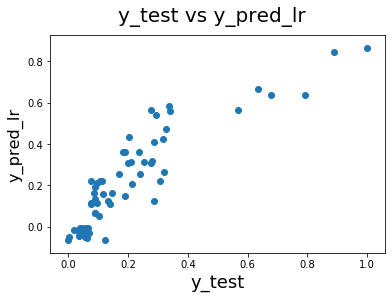

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lr)
fig.suptitle('y_test vs y_pred_lr', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_lr', fontsize=16)   

In [71]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     98.16
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           6.10e-47
Time:                        16:04:51   Log-Likelihood:                 136.60
No. Observations:                 143   AIC:                            -259.2
Df Residuals:                     136   BIC:                            -238.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0393      0.040     -0.986      0.3

## Summary


* R-sqaured and Adjusted R-squared (extent of fit) - 0.812 and 0.804 - 80% variance explained.
* F-stats and Prob(F-stats) (overall model fit) - 98.16 and 6.10e-47(approx. 0.0) - Model fir is significant and explained 80% variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

# Building SVR Models

In [72]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}

In [74]:
svr = SVR()

In [75]:
model = GridSearchCV(svr, param_grid=parameters)

In [76]:
model.fit(X_train_new, y_train)

/home/davidpraise/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
model.best_params_

{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

In [78]:
y_test_svr = model.predict(X_test_new)

In [79]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_svr)

0.7281968564757315

### Evaluation of the model

Text(0, 0.5, 'y_pred_svr')

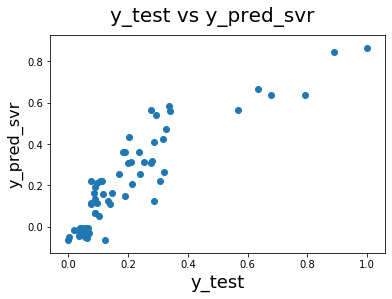

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lr)
fig.suptitle('y_test vs y_pred_svr', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_svr', fontsize=16)   

## Summary

This model is shown to have more errors than the Linear Regression Model based on the R2 Score. In the Linear Regression model our R2 Score is - 0.723 while in the Support Vector Regression Model our R2 Score is - 0.728 So we may discard the SVR Model.